In [15]:
import torch
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pytesseract
import seaborn as sns
import warnings 
import pandas as pd
warnings.filterwarnings('ignore')
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

%matplotlib inline

In [9]:
def crop_object(image, box):
    """Crops an object in an image

    Inputs:
    image: PIL image
    box: one box from Detectron2 pred_boxes
    """

    color_coverted = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pil_image=Image.fromarray(color_coverted)

    x_top_left = box[0]
    y_top_left = box[1]
    x_bottom_right = box[2]
    y_bottom_right = box[3]
    x_center = (x_top_left + x_bottom_right) / 2
    y_center = (y_top_left + y_bottom_right) / 2

    crop_img = pil_image.crop((int(x_top_left), int(y_top_left), int(x_bottom_right), int(y_bottom_right)))
    return crop_img

In [4]:
pt = r'\Database_Generation\ouput\Aadhar\Models\Yolov5s\v2.pt'

In [5]:
#model = torch.hub.load('ultralytics/yolov5', 'yolov5s', classes=5)
#model = torch.hub.load('ultralytics/yolov5', 'yolov5s', classes=5)
#model.load_state_dict(torch.load(pt)['model'].state_dict())

model = torch.hub.load('ultralytics/yolov5', 'custom', path=pt)

Using cache found in C:\Users\malla.praveen/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-1-27 torch 1.10.1+cpu CPU

Fusing layers... 
Model Summary: 232 layers, 7257306 parameters, 0 gradients
Adding AutoShape... 


In [6]:
img = r'\ouput\Aadhar\Front_Long\Front_Long_15.JPG'

image=cv2.imread(img)

results = model(image)
boxes,labels = results.pandas().xyxy[0].loc[:,['xmin', 'ymin', 'xmax', 'ymax']].values, results.pandas().xyxy[0].loc[:,'name'].values

C:\ProgramData\Anaconda3\lib\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


In [17]:
dic = {0:'Example', 1: 'Aadhar Number', 2: 'Address', 3: 'DOB', 4: 'Gender', 5: 'Name'}

In [25]:
list(dic.values()).index('DOB')

['Example', 'Aadhar Number', 'Address', 'DOB', 'Gender', 'Name']

In [32]:
print(labels)

pred_classes = list(map(lambda x: list(dic.values()).index(x),labels))

print(pred_classes)

['Aadhar Number' 'Address' 'Aadhar Number' 'DOB' 'Address']
[1, 2, 1, 3, 2]


In [10]:
for i in range(len(boxes)):
    box = boxes[i]
    crop_img = crop_object(image, box)
    crop_img = np.array(crop_img)
    crop_img = cv2.cvtColor(crop_img, cv2.COLOR_RGB2BGR)
    img = cv2.resize(crop_img, (300, 100))
    text = pytesseract.image_to_string(img)
    print(labels[i], ' : ' , text)
    plt.imshow(crop_img)
    plt.show()

['Aadhar Number']  :  POS Daaco



C:\Users\malla.praveen\AppData\Local\Temp/ipykernel_20224/185092985.py:10: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


['Address']  :  Address: S/Q Ashok Dubey,

2303,21st Cross,

K R Road.2nd Stage.
ashankari,Bangalore,

30083


['Aadhar Number']  :  611 3211 9265

VID : 611 3211 9265

['DOB']  :  DOB:7/6/2007

['Address']  :  D> esa omg / Your Aadhaar Nc

611 3211 9265

= esorS, TS Gon




In [12]:
plt.imshow(img)
plt.show()

C:\Users\malla.praveen\AppData\Local\Temp/ipykernel_20224/399247910.py:2: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


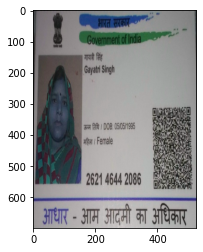

Using cache found in C:\Users\malla.praveen/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-1-27 torch 1.10.1+cpu CPU

Fusing layers... 
Model Summary: 232 layers, 7257306 parameters, 0 gradients
Adding AutoShape... 


[         xmin        ymin        xmax        ymax  confidence  class  \
0  171.614227  513.130615  351.582336  572.830750    0.907525      0   
1  207.398804  401.287964  263.200378  442.201569    0.850003      3   
2  218.896683  353.735535  335.476959  389.405426    0.835983      2   
3  160.227005  172.198669  270.941193  214.517319    0.757418      4   
4    2.988628  592.775940  155.967651  698.344543    0.550072      1   
5  382.958282  598.957947  525.000000  614.671936    0.497733      0   
6  259.931427  598.680054  486.454559  614.268677    0.291272      0   

           name  
0  AadharNumber  
1        Gender  
2           DOB  
3          Name  
4       Address  
5  AadharNumber  
6  AadharNumber  ]


In [21]:
image=cv2.imread(r'\Database_Generation\ouput\Aadhar\Dataset\Roboflow\1.jpg')
image = cv2.resize(image, (525, 700))

plt.imshow(image)
plt.show()

model = torch.hub.load('ultralytics/yolov5', 'custom', path=r'C:\Users\malla.praveen\Desktop\MacCamish-NGIN\Repo\Database_Generation\ouput\Aadhar\Models\Yolov5s\v5.pt')

results = model(image)
boxes,pred_classes = results.pandas().xyxy[0].loc[:,['xmin', 'ymin', 'xmax', 'ymax']].values, results.pandas().xyxy[0].loc[:,'name'].values
print(results.pandas().xyxy)

In [22]:
results.shape

AttributeError: 'Detections' object has no attribute 'shape'

In [20]:
pd.DataFrame(results.pandas().xyxy[0])

,xmin,ymin,xmax,ymax,confidence,class,name
0,171.614227,513.130615,351.582336,572.830750,0.907525,0,AadharNumber
1,207.398804,401.287964,263.200378,442.201569,0.850003,3,Gender
2,218.896683,353.735535,335.476959,389.405426,0.835983,2,DOB
3,160.227005,172.198669,270.941193,214.517319,0.757418,4,Name
4,2.988628,592.775940,155.967651,698.344543,0.550072,1,Address
5,382.958282,598.957947,525.000000,614.671936,0.497733,0,AadharNumber
6,259.931427,598.680054,486.454559,614.268677,0.291272,0,AadharNumber


In [23]:
pip freeze

- @ file:///D:/bld/click_1635822830533/workNote: you may need to restart the kernel to use updated packages.
-egex @ file:///C:/ci/regex_1617569893741/work
-gex @ file:///C:/ci/regex_1617569893741/work
-hardet @ file:///C:/ci/chardet_1607690654534/work
-lick @ file:///D:/bld/click_1635822830533/work
-mportlib-metadata @ file:///D:/bld/importlib-metadata_1642514138647/work
-rllib3 @ file:///home/conda/feedstock_root/build_artifacts/urllib3_1641584929973/work
-yparsing @ file:///home/conda/feedstock_root/build_artifacts/pyparsing_1642753572664/work
absl-py==1.0.0
anaconda-client @ file:///C:/ci/anaconda-client_1635342752200/work
anaconda-navigator==2.1.1
antlr4-python3-runtime==4.8



anyio==3.5.0
appdirs==1.4.4
argon2-cffi @ file:///home/conda/feedstock_root/build_artifacts/argon2-cffi_1640817743617/work
argon2-cffi-bindings @ file:///D:/bld/argon2-cffi-bindings_1640855429528/work
asttokens @ file:///home/conda/feedstock_root/build_artifacts/asttokens_1618968359944/work
astunparse==1.6.3
attrs @ file:///home/conda/feedstock_root/build_artifacts/attrs_1640799537051/work
audioread==2.1.9
azure-cognitiveservices-speech==1.19.0
azure-cognitiveservices-vision-computervision==0.9.0
azure-common==1.1.27
Babel==2.9.1
backcall @ file:///home/conda/feedstock_root/build_artifacts/backcall_1592338393461/work
backports.functools-lru-cache @ file:///home/conda/feedstock_root/build_artifacts/backports.functools_lru_cache_1618230623929/work
backports.tempfile==1.0
backports.weakref==1.0.post1
beautifulsoup4 @ file:///home/conda/feedstock_root/build_artifacts/beautifulsoup4_1631087867185/work
black==21.4b2
bleach @ file:///home/conda/feedstock_root/build_artifacts/bleach_1629908509